# **2017 Painting Data, Treatment II**
***Objective:* averaging the normalized individual XANES spectra for each particle within a given sample, as determined by the XRF maps by the co-location of Al, Si, and S**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- individual normalized XANES spectra, type = .dat, [dataset32] ()
> c_2017_MH0170_5_133_150.dat <br> c_2017_SKA2102_8_190_222.dat

### Steps:
- follow script below

### Output:
- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset33] ()
> c_2017_MH0170_5_vals_133to137_date_1.csv <br> 
c_2017_MH0170_5_vals_138to140_date_1.csv <br>
c_2017_MH0170_5_vals_141to142_date_1.csv <br>
c_2017_MH0170_5_vals_143to145_date_1.csv <br>
c_2017_MH0170_5_vals_146to148_date_1.csv <br>
c_2017_MH0170_5_vals_149to150_date_1.csv <br> <br>
c_2017_SKA2102_8_vals_190to191_date_1.csv <br>
c_2017_SKA2102_8_vals_192to193_date_1.csv <br>
c_2017_SKA2102_8_vals_194to195_date_1.csv <br>
c_2017_SKA2102_8_vals_196to198_date_1.csv <br>
c_2017_SKA2102_8_vals_199to202_date_1.csv <br>
c_2017_SKA2102_8_vals_203only_date_1.csv <br>
c_2017_SKA2102_8_vals_204to207_date_1.csv <br>
c_2017_SKA2102_8_vals_208to212_date_1.csv <br>
c_2017_SKA2102_8_vals_213to215_date_1.csv <br>
c_2017_SKA2102_8_vals_216to217_date_1.csv <br>
c_2017_SKA2102_8_vals_218to219_date_1.csv <br>
c_2017_SKA2102_8_vals_220to222_date_1.csv 
 
### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- samples of interest
    - MH0170_5, Mauritshuis, Jan Steen, *The Life of Man*
    - SK-A-2102_8, Rijksmuseum, Jan Brueghel II, *Still Life with Flowers in a Glass*
- output filename components separated by underscores
    - c for constant edge parameters for normalization
    - beamtime year
    - accession number
    - sample number
    - 'vals' for values
    - range of individual scans included in the average
    - 'date' is date file was written
    - index

In [1]:
%pylab inline
import re
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('dataset_33')
except OSError:
    pass

In [4]:
##function to read in spectra per filename (ie sample)
def read_multi(filename):
    txt = open(filename).read()
    starts = []
    for match in re.finditer(r'#S', txt, re.DOTALL | re.MULTILINE):
        starts.append(match.start())
    starts.append(len(txt))
    parts = []
    for start, stop in zip(starts[:-1], starts[1:]):
        parts.append( array(([ [float(x) for x in line.split()] for line in (txt[start:stop-1].splitlines()[4:]) ])) )
    parts = array(parts)   
    return parts

Start here for each new file import...

In [5]:
##Choose the desired file (from 'dataset_32')

#filename = 'c_2017_MH0170_5_133_150.dat'
filename = 'c_2017_SKA2102_8_190_222.dat'

filename = os.path.join('dataset_32', filename)

In [6]:
##preparation for saving
basename, ext = os.path.splitext(os.path.basename(filename))
savename, first, last = re.match('(.+)_([0-9]+)_([0-9]+)$', basename).groups()
first, last = int(first), int(last) 
savename, first, last

('c_2017_SKA2102_8', 190, 222)

In [7]:
##preparation for plotting
scans = [ '{}'.format(x).zfill(3) for x in range(first, last+1) ]
columns = ['energy'] + ['s{}'.format(x) for x in scans]
columns

['energy',
 's190',
 's191',
 's192',
 's193',
 's194',
 's195',
 's196',
 's197',
 's198',
 's199',
 's200',
 's201',
 's202',
 's203',
 's204',
 's205',
 's206',
 's207',
 's208',
 's209',
 's210',
 's211',
 's212',
 's213',
 's214',
 's215',
 's216',
 's217',
 's218',
 's219',
 's220',
 's221',
 's222']

In [8]:
##reading in file
parts = read_multi(filename)
c_[parts[0,:,0], parts[:,:,1].T].shape

(350, 34)

In [9]:
print(len(columns))
print(parts.shape) ##(number of spectra, number of signals measured, number of points per signal measured(x,y))

34
(33, 350, 2)


In [10]:
##checks to make sure all have the same x-values; output should be 0
parts[:,:,0].ptp(0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [11]:
##puts spectra into dataframe with spectra #s as column names

##if cell above outputs all 0s, then all x-values (ie. energies recorded) are equivalent
##for plotting, need only one energy axis from any spectrum
##defining an array of energy values
x = parts[0, :, 0]*1000 ##energies, in eV
x.shape

##defining an array of intensity values for all spectra
y = parts[:,:,1].T
y.shape

df = pd.DataFrame(c_[x, y], columns=columns)
df

,energy,s190,s191,s192,s193,s194,s195,s196,s197,s198,...,s213,s214,s215,s216,s217,s218,s219,s220,s221,s222
0,2460.09,0.008022,-0.005524,-0.007874,0.016601,-0.001955,-0.001619,-0.006941,-0.003482,-0.007586,...,-0.018153,-0.010580,0.001355,-0.004390,-0.010487,0.001381,-0.003826,0.008312,-0.008128,-0.007722
1,2460.28,-0.003642,-0.002534,-0.007560,-0.001190,0.002986,-0.001192,-0.012082,0.005089,-0.010906,...,0.002070,-0.002269,-0.006550,-0.006960,-0.014465,-0.015744,-0.006257,0.001778,-0.006987,-0.011607
2,2460.47,-0.001357,-0.004493,-0.014363,0.006413,-0.011321,-0.000307,0.001770,-0.003882,0.016979,...,-0.004765,-0.010580,0.007503,0.020644,-0.002076,-0.010878,0.001182,-0.006395,0.008025,0.012447
3,2460.66,-0.012961,0.001422,0.007823,-0.003456,-0.008873,-0.008203,-0.012082,-0.008538,0.004977,...,-0.014865,0.008248,-0.000976,-0.020411,-0.002792,0.007920,-0.010699,0.004407,-0.011853,-0.000300
4,2460.85,0.000040,0.005245,-0.014363,-0.005872,-0.006925,-0.007679,-0.012082,-0.008538,-0.001845,...,-0.005158,-0.009527,-0.004039,-0.000917,-0.006301,0.004708,-0.008994,-0.001436,0.003103,-0.004044
5,2461.04,-0.003652,-0.000027,0.000734,-0.004055,0.000800,-0.006213,-0.006124,-0.001377,-0.005862,...,-0.018153,-0.008021,-0.007471,-0.001709,-0.010713,0.004082,-0.007044,-0.001048,0.000713,-0.011607
6,2461.23,0.001662,-0.001918,-0.005451,-0.000394,0.008115,0.000250,0.001950,-0.008538,-0.010906,...,0.002941,-0.010580,0.000927,0.029316,0.001245,0.006484,0.004780,0.005590,-0.011853,0.011074
7,2461.42,-0.012257,-0.004471,0.009419,-0.004575,-0.000175,-0.005817,-0.003371,0.009317,0.006539,...,-0.011712,0.004472,0.005524,0.012492,0.006661,-0.015744,0.002238,0.013234,0.002186,-0.001049
8,2461.61,-0.013654,-0.001900,-0.000676,0.000191,0.000974,0.009646,0.003883,0.011566,-0.000117,...,0.000185,0.001684,0.001128,-0.020411,0.000123,-0.002291,-0.002648,-0.007176,0.014578,0.011481
9,2461.80,0.011922,-0.012813,-0.014363,0.006427,0.004901,0.007871,-0.010285,-0.002786,-0.003007,...,-0.001420,-0.010580,-0.003146,0.019661,-0.011101,0.014942,0.006977,-0.013294,-0.011853,-0.006165


In [12]:
##making dataframes for plotting
x_plot = df[['energy']]
y_plot = df.iloc[:,1:25]

Repeat the next cells for a given sample for each set of spectra to be averaged; then return to the top to load a new sample

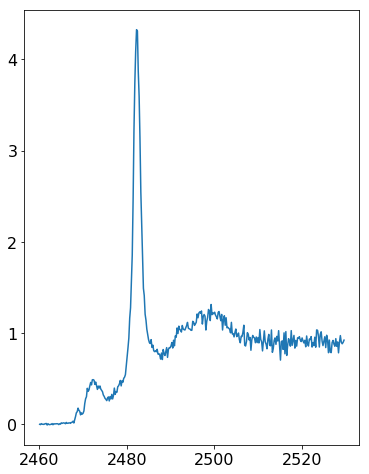

In [13]:
##Choose spectra from a given lazurite particles and averaged
##based on colocation of Si, Al, and S in XRF map of sample

##making an array of only certain columns of df from which to take their mean

##for sample 'c_2017_MH0170_5_133_150.dat'
#wanted = df[['s133', 's134', 's135', 's136', 's137']]
#wanted = df[['s138', 's139', 's140']]
#wanted = df[['s141', 's142']]
#wanted = df[['s143', 's144', 's145']]
#wanted = df[['s146', 's147', 's148']]
#wanted = df[['s149', 's150']]

##for sample 'c_2017_SKA2102_8_190_222.dat'
#wanted = df[['s190', 's191']]
#wanted = df[['s192', 's193']]
#wanted = df[['s194', 's195']]
#wanted = df[['s196', 's197', 's198']]
#wanted = df[['s199', 's200', 's201', 's202']]
#wanted = df[['s203']]
#wanted = df[['s204', 's205', 's206', 's207']]
#wanted = df[['s208', 's209', 's210', 's211', 's212']]
#wanted = df[['s213', 's214', 's215']]
#wanted = df[['s216', 's217']]
#wanted = df[['s218', 's219']]
wanted = df[['s220', 's221', 's222']]

##taking the mean of the spectra selected above
y_mn = wanted.T.mean().values  ##sames as mean(axis=1) without Transpose

plt.figure(figsize=(6,8))
tmp = plot(x, y_mn) ##just to see

In [14]:
frames = [pd.DataFrame(df['energy']),
          pd.DataFrame(wanted),
          pd.DataFrame(y_mn, columns = {'mean'})]
save_bits = pd.concat(frames, axis = 1)
save_bits

,energy,s220,s221,s222,mean
0,2460.09,0.008312,-0.008128,-0.007722,-0.002513
1,2460.28,0.001778,-0.006987,-0.011607,-0.005606
2,2460.47,-0.006395,0.008025,0.012447,0.004692
3,2460.66,0.004407,-0.011853,-0.000300,-0.002582
4,2460.85,-0.001436,0.003103,-0.004044,-0.000792
5,2461.04,-0.001048,0.000713,-0.011607,-0.003981
6,2461.23,0.005590,-0.011853,0.011074,0.001604
7,2461.42,0.013234,0.002186,-0.001049,0.004791
8,2461.61,-0.007176,0.014578,0.011481,0.006294
9,2461.80,-0.013294,-0.011853,-0.006165,-0.010437


In [15]:
##making a list of the column names so my output csv has the scan number, etc as the header
head_bits = list(save_bits.columns.values)

##preparation for saving
first_spec = head_bits[1][1:]

if head_bits[1][1:] == head_bits[-2][1:]:
    last_spec = 'only'
else:
    last_spec = 'to{}'.format(head_bits[-2][1:])

print(head_bits)
print(first_spec)
print(last_spec)

['energy', 's220', 's221', 's222', 'mean']
220
to222


In [16]:
##saving csv of mean data and the individual spectra that led to that mean
savefmt = os.path.join('dataset_33',
                       '{}{}{}{}{}{}{}{{:d}}.csv'.format(savename, '_vals_', first_spec, last_spec, '_', date, '_'))
i = 1
while os.path.exists(savefmt.format(i)):
    i += 1
np.savetxt(savefmt.format(i), save_bits, delimiter =',', header = ','.join(head_bits), comments = '')

##note: comments = '' is so that there is no '#' at the start of my headers

### continue to sheet '10_2018paint_Treatment-I...'